# Trabalho de Implementação 1

**<font color='red'>Discipline: CMP197 - Introdução à Visão Computacional</font>**

Professor:

- Cláudio Jung

Authors:
- Lucas Nedel Kirsten, 230262
- Diego Severo Jardim, 319862

## Importing the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cvwt # import our module for Wavelet Transform
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# available functions on the cvwt module
cvwt.__all__

['wavelet_1d',
 'inv_wavelet_1d',
 'wavelet_2d',
 'inv_wavelet_2d',
 'compact_image',
 'apply_soft_thresholding',
 'plot_dwt2',
 'psnr',
 'dwt',
 'dwt2',
 'idwt',
 'idwt2']

In [4]:
# use the following sintax for function documentation
cvwt.dwt?

## Question 1

**Define iterations, input signal and the filter type**

In [5]:
# input signal
x = np.array([1, 2, -1, 3, 6, -2, -1, 3])

# number of iterations
J = 3

# wavelet family
# you can try with other available families in the PyWavelet lib
wavelet = 'sym19'

**Going forward in the wavelet transform**

In [6]:
print('Wavelet:')
cA, cD = cvwt.dwt(x=x, J=J, wavelet=wavelet)

print(f'A{J}: ', cA)
for j, dj in enumerate(cD):
    print(f'D{j+1}: ', dj)

Wavelet:
A3:  [-1.51921837e-16 -6.79688106e-14 -6.96642873e-12  9.48250184e-12
  1.64261943e-09 -3.18561790e-08  3.11925567e-07 -2.97406079e-07
 -3.17244936e-05  3.80632482e-04 -2.01036975e-03  4.66695567e-03
 -2.79260232e-03  2.27994279e-02 -1.39195973e-01 -2.07031446e-01
  1.21812521e+00  3.20188950e+00 -5.82011043e-01  4.24448745e-01
 -7.00294527e-02  2.23288525e-02 -3.03889704e-03  6.38136314e-04
 -5.50711397e-05  5.99781914e-06  3.98060826e-07  4.04354226e-08
 -3.28847610e-10  1.73723446e-10  1.24949971e-11 -2.04824530e-14
 -3.28257218e-17]
D1:  [-1.43955654e-06  3.21657628e-05 -3.05979298e-04  1.66948846e-03
 -5.04276051e-03  1.33007776e-03  7.36968048e-02 -4.75937544e-01
  1.55831358e+00 -4.17953163e+00  3.65973160e+00  4.49044259e-01
 -1.83809254e+00 -4.10647114e-02  6.07296326e-02  3.77687916e-02
 -8.00989591e-03 -2.14239144e-03  7.46387065e-04 -2.93242085e-05
 -1.27395089e-05  1.39032211e-06]
D2:  [ 2.29835971e-11  1.03841630e-09 -2.95888274e-08  2.42847048e-07
 -4.04566396e-

**Returning to the original signal**

In [7]:
print('\nInverse Wavelet:')
inv = cvwt.idwt(cA, cD, wavelet=wavelet)
print(f'Inverse(A{J-j}): ', inv)


Inverse Wavelet:
Inverse(A1):  [ 1.  2. -1.  3.  6. -2. -1.  3.]


## Question 2

**Define the input image, number of iterations and the filter type**

In [8]:
# open image
x = cv2.imread('cvwt/barbara.jpg')
x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)

# number of iterations
J = 2

# wavelet family
wavelet = 'haar'

**Apply and plot wavelet transform**

/home/diegosevero/Projects/UFRGS/ComputerVisionUFRGS/TP1/cvwt/wavelets.py:135: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  cA_ch, cD_ch = _dwt(xx)


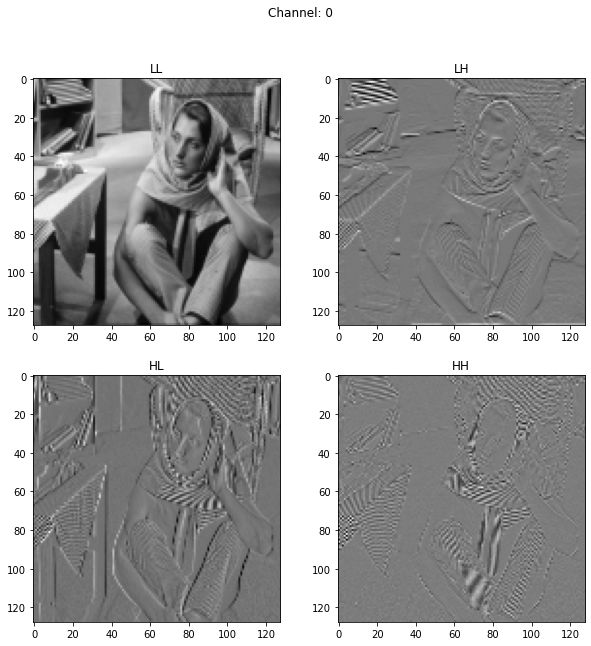

In [9]:
cA, cD = cvwt.dwt2(x, J=J, wavelet=wavelet)
cvwt.plot_dwt2(cA, cD[-1], 'gray')

**Visualize inverse transform and calculate the MSE diference with the original image**

MSE: 3947.434136003256


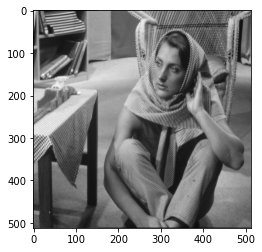

In [10]:
inv = cvwt.idwt2(cA, cD, wavelet=wavelet)
plt.imshow(inv.astype('uint8'), 'gray')

print('MSE:', np.mean(np.square(inv-x)))

## Question 3

**Define the input image, number of iterations, filter type and noise and soft-threshold parameters**

In [32]:
# open image
x = cv2.imread('cvwt/barbara.jpg')
x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)

# array of iterations
Js = [2, 3, 4]

# wavelet family
wavelet = 'haar'

# noise parameters
mean = 0
var = 100

# soft-threshold parameters 
ts = np.random.choice(np.linspace(0, 255, num=255, dtype='float'), 4)

**Add noise to the image and make a comparison between both original and noisy images**

PSNR[Original vs Original] = 100.00 dB
PSNR[Original vs Noise] = 27.91 dB


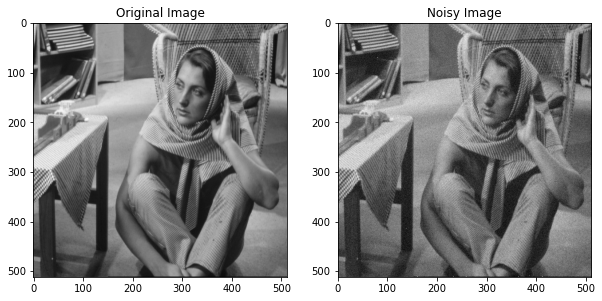

In [33]:
# add noise to the image
sigma = np.sqrt(var)
noise = x.astype('float32') + np.random.normal(mean,sigma, x.shape)
noise = np.uint8(noise)

psnr_ori_ori = cvwt.psnr(x, x)
psnr_ori_noise = cvwt.psnr(x, noise)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(x, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(noise, cmap='gray')
axs[1].set_title('Noisy Image')

print(f"PSNR[Original vs Original] = {psnr_ori_ori:.2f} dB")
print(f"PSNR[Original vs Noise] = {psnr_ori_noise:.2f} dB")

**Apply the soft-thresholding on the wavelet coefficients and plot the results**

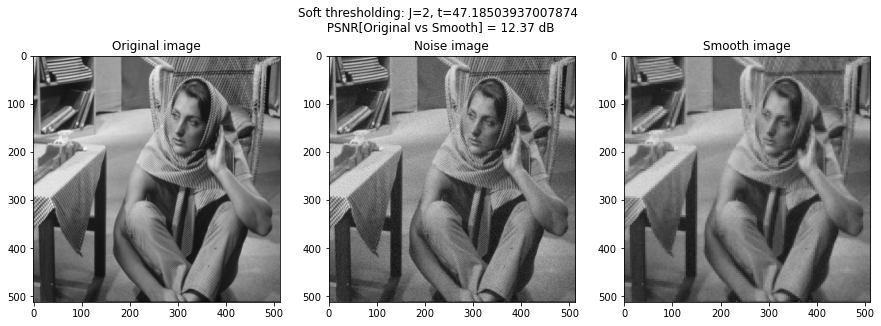

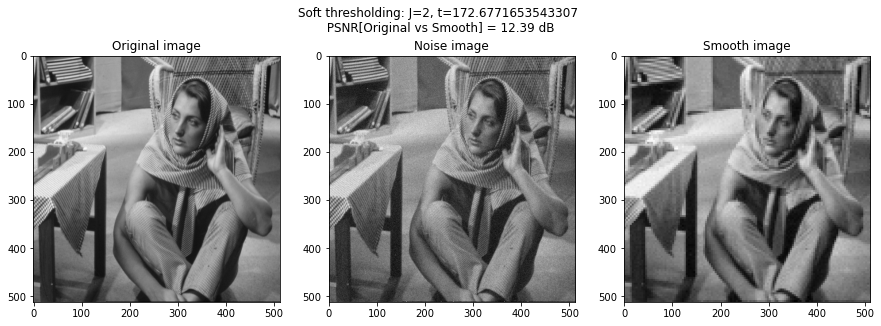

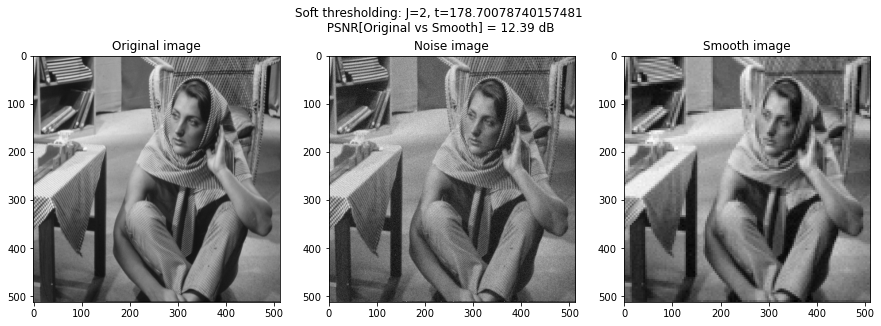

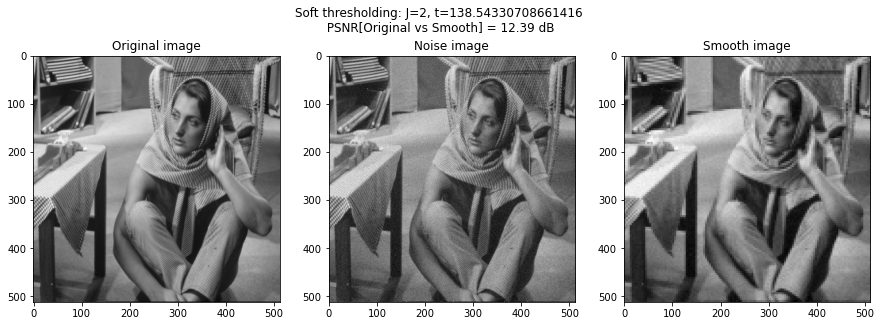

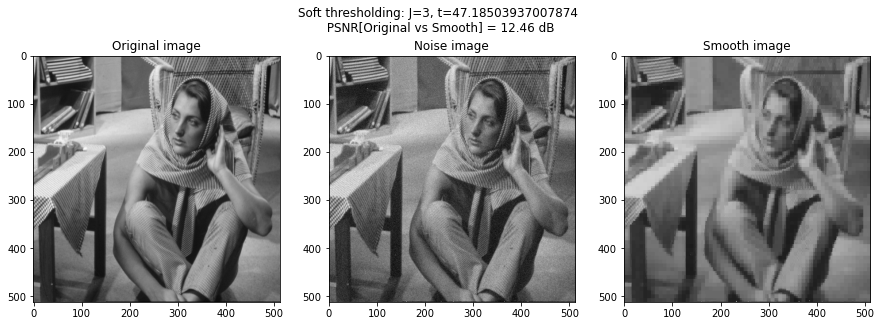

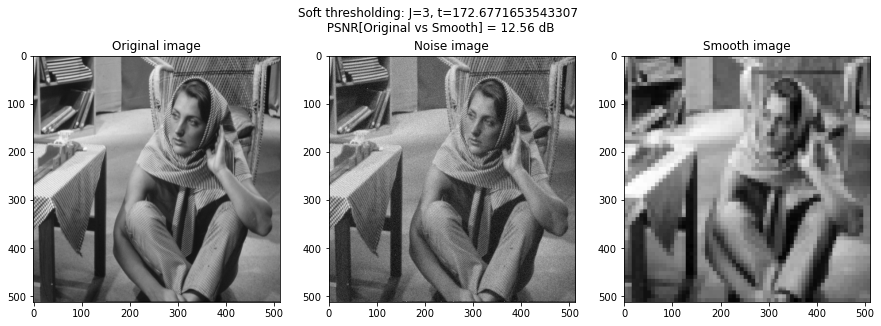

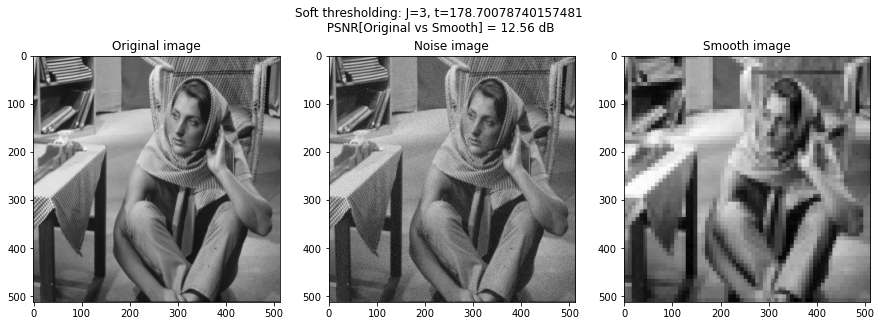

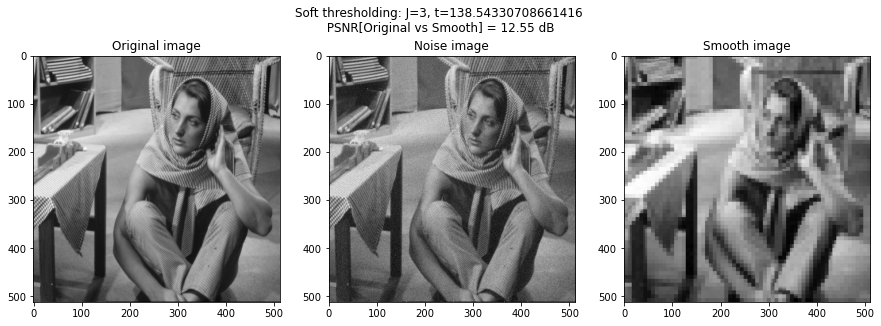

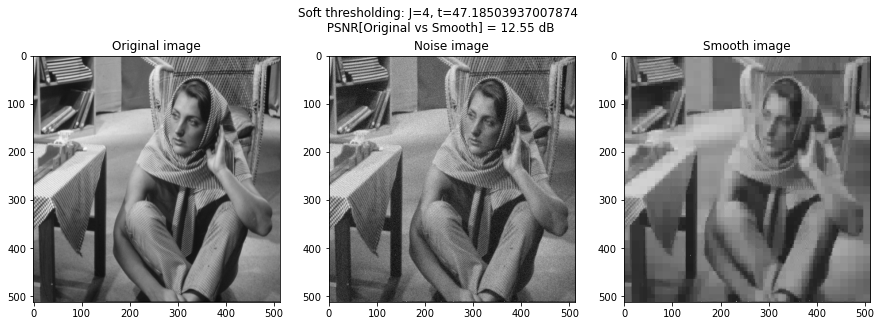

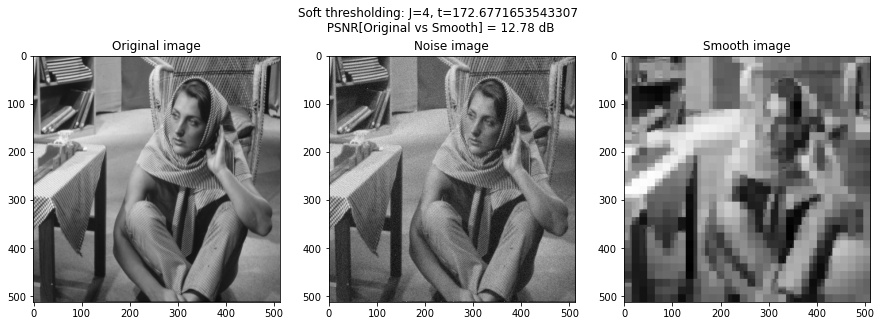

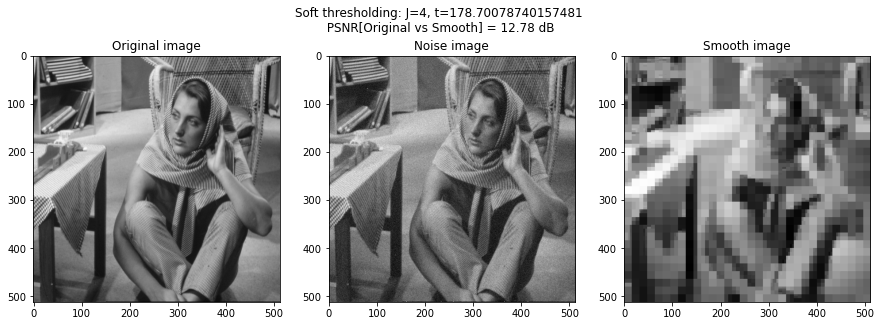

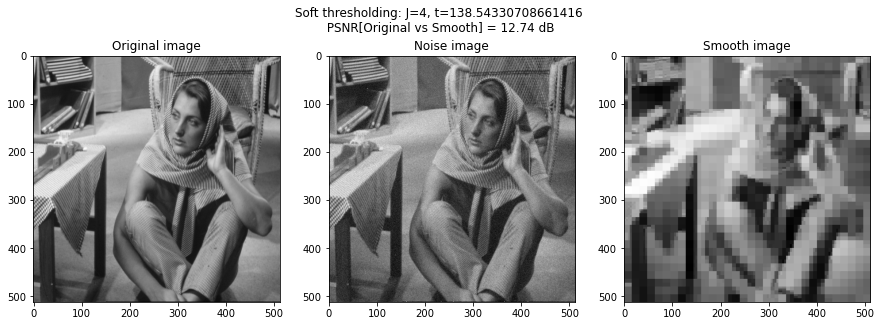

In [34]:
for J in Js:
    for t in ts:
        smooth = cvwt.apply_soft_thresholding(noise, J=J, t=t, wavelet=wavelet)
        psnr_ori_smooth = cvwt.psnr(x, smooth)

        fig, axs = plt.subplots(1,3, figsize=(15,5))
        fig.suptitle(f'Soft thresholding: J={J}, t={t}\n PSNR[Original vs Smooth] = {psnr_ori_smooth:.2f} dB')
        
        axs[0].imshow(x, cmap='gray')
        axs[0].set_title('Original image')
        
        axs[1].imshow(noise, cmap='gray')
        axs[1].set_title('Noise image')
        
        axs[2].imshow(smooth, cmap='gray')
        axs[2].set_title('Smooth image')

## Question 4

**Define the input image, number of iterations and the parameters for compaction**

In [35]:
# open image
x = cv2.imread('cvwt/barbara.jpg')
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

# array of iterations
Js = [4]

# define possible alpha values
alphas = [0.25, 0.5, 0.75, 0.9]

**Compact the image and compare the reconstructed image to the original one**

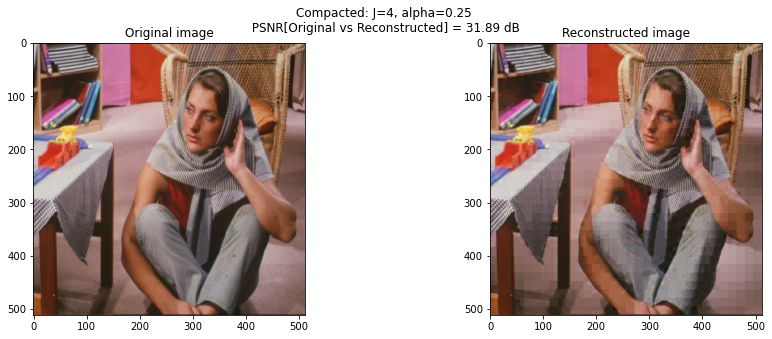

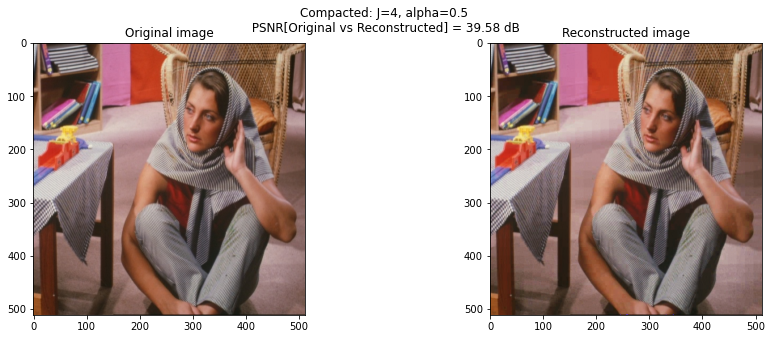

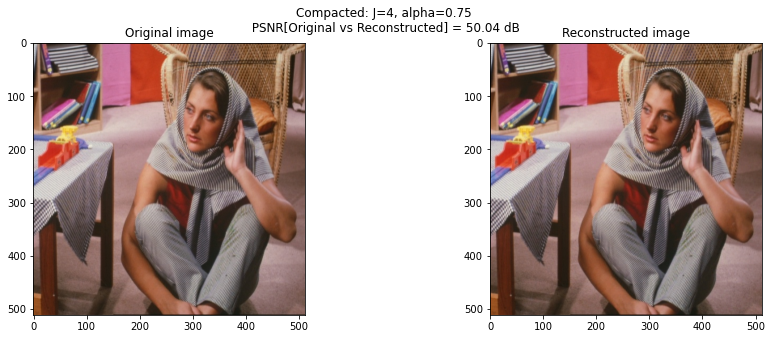

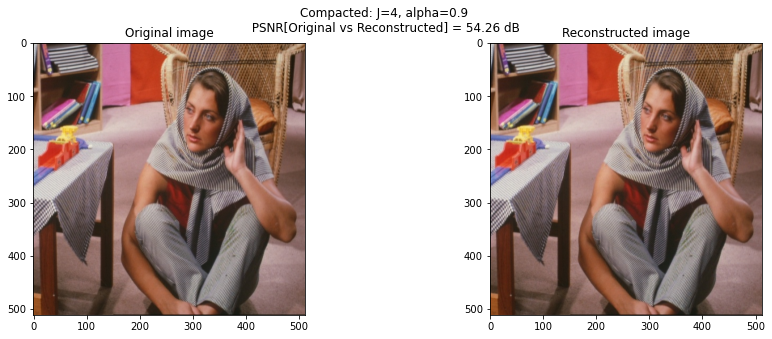

In [36]:
for J in Js:
    for alpha in alphas:
        (cA, Dj, reconstructed) = cvwt.compact_image(x, J=J, alpha=alpha)
        psnr_ori_rec = cvwt.psnr(x, reconstructed)
        
        fig, axs = plt.subplots(1,2, figsize=(15,5))
        fig.suptitle(f'Compacted: J={J}, alpha={alpha}\n PSNR[Original vs Reconstructed] = {psnr_ori_rec:.2f} dB')
        axs[0].imshow(x)
        axs[0].set_title('Original image')

        axs[1].imshow(reconstructed)
        axs[1].set_title('Reconstructed image')

**Experiment compressing the image**

In [37]:
# open image
x = cv2.imread('cvwt/barbara.jpg')
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

# define number of iterations
J = 4

# define alpha value
alpha = 0.75

In [38]:
import os
import pickle
import zipfile

# compress and convert the image to bytes and save it
(cA, Dj, reconstructed) = cvwt.compact_image(x, J=J, alpha=alpha)

bytes_data = pickle.dumps((cA, Dj))
open('coefficients.pkl', 'wb').write(bytes_data)

# compress to gzip to leverage matrix sparcity
with zipfile.ZipFile('coefficients_zipped.zip', 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write('coefficients.pkl')

# print the size of the saved files
print('Size of original JPG image: {:.2f} KB'.format(float(os.path.getsize('cvwt/barbara.jpg'))/1024.))
print('Size of wavelet coefficients: {:.2f} KB'.format(float(os.path.getsize('coefficients.pkl'))/1024.))
print('Size of gzip compressed wavelet coefficients: {:.2f} KB'.format(float(os.path.getsize('coefficients_zipped.zip'))/1024.))

Size of original JPG image: 99.85 KB
Size of wavelet coefficients: 6144.36 KB
Size of gzip compressed wavelet coefficients: 1273.93 KB
